# Iris Data Visualisation Tutorial

**Date:** Tuesday 29th November 2022<br>
**Speaker:** Laura Dreyer

An introduction to Iris and Cartopy which are two open source Python tools for the analysis and visualisation of weather and climate data.

## Introduction

### Iris

<img src="https://scitools-iris.readthedocs.io/en/latest/_static/iris-logo-title.svg" width="300" height="200">

Iris (https://scitools.org.uk/iris/docs/latest/) does file I/O and data manipulation, using other third party Python packages such as:

  * **numpy**: https://github.com/numpy/numpy
  * **dask**: https://dask.pydata.org/en/latest/
  * **matplotlib**: https://github.com/matplotlib/matplotlib

### Cartopy

<img src="https://scitools.org.uk/cartopy/docs/latest/_static/cartopy.png" width="300" height="200">
Cartopy (https://scitools.org.uk/cartopy/docs/latest/) adds extends Iris data visualisation to include different types of mapping.

### About Jupyter notebooks

This is a jupyter notebook. It's a mechanism for running Python code via a web browser.

Code (and other content) can be added to the notebook in cells. Code cells contain code which can be executed:

In [1]:
import numpy
print(1+2)

3


Other types of cell can contain other content. The primary other type of content is markdown (rich text), such as this cell. 

Executing a markdown cell renders the content of the cell (including **bold**, _italic_ and `preformatted` text) as rich text.

## Topics we will cover:

* The Iris cube
* Loading and saving
* Subsetting and joining data
* Analysis and statistics
* Data visualisation
* Cartopy map projections
* Unstrucured meshes

## Iris

Iris provides a consistent Python interface for loading, saving, analysing and visualising different weather and climate data formats. 

Iris is a free and open-source Python library hosted on GitHub; see https://github.com/scitools/iris.

Full documentation for Iris can be found at http://scitools.org.uk/iris/docs/latest/index.html.

### Installation

You can install Iris using conda (https://docs.conda.io/en/latest/miniconda.html) with the following command:

```conda install -c conda-forge iris```

We also provide some sample data that can be used, which can also be installed using conda:

```conda install -c conda-forge iris-sample-data```

Further details on Iris installation, including other ways to install Iris, are available at https://scitools-iris.readthedocs.io/en/latest/installing.html

_Note: Sometimes conda can be a bit slow. If your environment is taking too long to resolve, you can try using mamba (https://mamba.readthedocs.io/en/latest/)_

### The Iris cube

The cube is the data model used by Iris to represent to represents all datasets loaded in Iris.

A cube is an interpretation of the [Climate and Forecast (CF) Metadata Conventions](https://cfconventions.org/).

A cube contains data (commonly a NumPy array) and metadata that describes the NumPy array (such as what the data in the NumPy array describes, the units of the data, where in space and time the data describe, and so on).


#### A simple cube example

Suppose we have some gridded data which has 24 air temperature readings (in Kelvin) which is located at 4 different longitudes, 2 different latitudes and 3 different heights. Our data array can be represented pictorially:

<img src="https://scitools-iris.readthedocs.io/en/latest/_images/multi_array_to_cube.png" width="350" height="250">

Where dimensions 0, 1, and 2 have lengths 3, 2 and 4 respectively.

The Iris cube to represent this data would consist of:
* a **name** of `air_temperature` and a **unit** of `kelvin`
* a **data array** of shape `(3, 2, 4)`
* a **coordinate**, mapping to dimension 0, consisting of:
    * a name of `height` and unit of `meters`
    * an array of length 3 representing the 3 height points
* a **coordinate**, mapping to dimension 1, consisting of:
    * a name of `latitude` and unit of `degrees`
    * an array of length 2 representing the 2 latitude points
* a **coordinate**, mapping to dimension 2, consisting of:
    * a name of `longitude` and unit of `degrees`
    * an array of length 4 representing the 4 longitude points

#### Loading a cube

Let's load a file from the [Iris sample data](https://github.com/SciTools/iris-sample-data) repository as an Iris cube and print the cube to take a look at Iris' representation of the cube object:

In [2]:
import iris

In [3]:
cubes = iris.load(iris.sample_data_path('A1B_north_america.nc'))
print(cubes)

0: air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)


/var/tmp/ipykernel_69692/42615256.py:1: FutureWarning: Ignoring a datum in netCDF load for consistency with existing behaviour. In a future version of Iris, this datum will be applied. To apply the datum when loading, use the iris.FUTURE.datum_support flag.
  cubes = iris.load(iris.sample_data_path('A1B_north_america.nc'))


In [4]:
a1b_cube = cubes[0]
print(a1b_cube)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
    Dimension coordinates:
        time                             x              -              -
        latitude                         -              x              -
        longitude                        -              -              x
    Auxiliary coordinates:
        forecast_period                  x              -              -
    Scalar coordinates:
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
    Cell methods:
        mean                        time (6 hour)
    Attributes:
        Conventions                 'CF-1.5'
        Model scenario              'A1B'
        STASH                       m01s03i236
        source                      'Data from Met Office Unified Model 6.05'


This dataset records `air_temperature`, measured in `Kelvin`, over North America, according to the A1B climate scenario. The cube represents 3D `(time, latitude, longitude)` data, with all temperatures recorded at the screen level of 1.5m.

Iris supports loading of all major weather and climate fileformats - NetCDF as above, GRIB, FF & PP; as well as some fileformats that are more specific to the Met Office. Iris maintains the single common cube data model when loading datasets stored in all these different formats. This means all these file formats will be represented equivalently in Iris.

#### Coordinates

Coordinates are used to describe the location of a cube's data. This could be location on the Earth's surface (i.e. latitudes and longitudes), in height (including hybrid height / pressure), time, realisation.

Iris defines three types of coordinate:
* **dimension coordinates** are strictly 1D and monotonic. They describe and name one of a cube's dimensions.
* **auxiliary coordinates** have no restrictions on dimensionality or coordinate values. They are secondary (i.e. "auxiliary") metadata for describing one or more cube dimensions.
* **scalar coordinates** contain only a single value that is true for every point within the cube's data.

Let's take a closer look at accessing the A1B cube's time coordinate:

In [5]:
t_coord = a1b_cube.coord('time')
print(t_coord)

DimCoord :  time / (hours since 1970-01-01 00:00:00, 360_day calendar)
    points: [
        1860-06-01 00:00:00, 1861-06-01 00:00:00, ...,
        2098-06-01 00:00:00, 2099-06-01 00:00:00]
    bounds: [
        [1859-12-01 00:00:00, 1860-12-01 00:00:00],
        [1860-12-01 00:00:00, 1861-12-01 00:00:00],
        ...,
        [2097-12-01 00:00:00, 2098-12-01 00:00:00],
        [2098-12-01 00:00:00, 2099-12-01 00:00:00]]
    shape: (240,)  bounds(240, 2)
    dtype: float64
    standard_name: 'time'
    var_name: 'time'


#### Summary: The Iris cube

* Iris represents data and metadata as cubes
* Iris' data model is based on CF conventions
* Data can be loaded with `iris.load('my_file.pp')`


### Subsetting cubes

Iris provides a couple of different mechanisms for subsetting a cube: **indexing** and **constraints / extract**.

Cubes can be **indexed** like NumPy arrays:

In [6]:
# Index the cube to get the first 10 time values, a single latitude value, and 5 longitude values.
print(a1b_cube[:10, 15, 5:10])

air_temperature / (K)               (time: 10; longitude: 5)
    Dimension coordinates:
        time                             x              -
        longitude                        -              x
    Auxiliary coordinates:
        forecast_period                  x              -
    Scalar coordinates:
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
        latitude                    33.75 degrees
    Cell methods:
        mean                        time (6 hour)
    Attributes:
        Conventions                 'CF-1.5'
        Model scenario              'A1B'
        STASH                       m01s03i236
        source                      'Data from Met Office Unified Model 6.05'


A cube can only contain data describing a single phenomenon. If we load a dataset containing more than one phenomenon we receive a cubelist:

In [7]:
cubes = iris.load(iris.sample_data_path('uk_hires.pp'))
print(cubes)

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
1: surface_altitude / (m)              (grid_latitude: 204; grid_longitude: 187)


We can limit this load to only return the cube describing a single phenomenon by using a load _constraint_. The most simple constraint uses only the name of the cube of interest:

In [8]:
apt_cube = iris.load_cube(iris.sample_data_path('uk_hires.pp'), 'air_potential_temperature')
print(apt_cube)

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
    Dimension coordinates:
        time                             x                      -                 -                    -
        model_level_number               -                      x                 -                    -
        grid_latitude                    -                      -                 x                    -
        grid_longitude                   -                      -                 -                    x
    Auxiliary coordinates:
        forecast_period                  x                      -                 -                    -
        level_height                     -                      x                 -                    -
        sigma                            -                      x                 -                    -
        surface_altitude                 -                      -                 x                  

We could make this as an actual constraint object and then use it to _extract_ from an existing cubelist:

In [9]:
apt_cstr = iris.Constraint(name='air_potential_temperature')
apt_cube = cubes.extract_cube(apt_cstr)
print(apt_cube)

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
    Dimension coordinates:
        time                             x                      -                 -                    -
        model_level_number               -                      x                 -                    -
        grid_latitude                    -                      -                 x                    -
        grid_longitude                   -                      -                 -                    x
    Auxiliary coordinates:
        forecast_period                  x                      -                 -                    -
        level_height                     -                      x                 -                    -
        sigma                            -                      x                 -                    -
        surface_altitude                 -                      -                 x                  

Iris constraints and extract allow you to subset a cube based on metadata values:

In [10]:
# Extract from the cube based on latitude and longitude coordinate values.
# Coordinate values can be specified directly or via an inequality.
lat_lon_values = {'latitude': [16.25, 17.5 , 18.75, 20.],
                  'longitude': lambda cell: 255. <= cell < 300.}
lat_lon_constraint = iris.Constraint(coord_values=lat_lon_values)

lat_lon_subset_cube = a1b_cube.extract(lat_lon_constraint)
print(lat_lon_subset_cube)

air_temperature / (K)               (time: 240; latitude: 4; longitude: 24)
    Dimension coordinates:
        time                             x              -             -
        latitude                         -              x             -
        longitude                        -              -             x
    Auxiliary coordinates:
        forecast_period                  x              -             -
    Scalar coordinates:
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
    Cell methods:
        mean                        time (6 hour)
    Attributes:
        Conventions                 'CF-1.5'
        Model scenario              'A1B'
        STASH                       m01s03i236
        source                      'Data from Met Office Unified Model 6.05'


In [11]:
print(lat_lon_subset_cube.coord('longitude'))

DimCoord :  longitude / (degrees)
    points: [255.   , 256.875, ..., 296.25 , 298.125]
    shape: (24,)
    dtype: float32
    standard_name: 'longitude'
    var_name: 'longitude'
    coord_system: GeogCS(6371229.0)


In [12]:
print(lat_lon_subset_cube.coord('longitude').points)

[255.    256.875 258.75  260.625 262.5   264.375 266.25  268.125 270.
 271.875 273.75  275.625 277.5   279.375 281.25  283.125 285.    286.875
 288.75  290.625 292.5   294.375 296.25  298.125]


#### Summary: Subsetting cubes

In Iris, you can subset a cube with:

* numpy style indexing `sub_cube = cube[0, :10]`
* using a constraint
    * at load time: `cube = iris.load_cube('my_file.pp', 'air_potential_temperature')`
    * using extract: `sub_cube = cube.extract(iris.Constraint(grid_latitude=0))`

### Combining cubes

Iris provides functionality that takes a number of existing cubes and combines them to produce fewer output cubes:
* **merge** takes multiple cubes that differ only in a scalar coordinate values and combines them to produce a new cube with a new dimension created from the scalar coordinate values
* **concatenate** extends an existing dimension on a cube by adding another cube to the end of the dimension.

<img src="https://scitools-iris.readthedocs.io/en/latest/_images/merge_and_concat.png" width="350" height="250">


Let's take a quick look at an example of merging a number of cubes:

In [13]:
cubes = iris.load_raw(iris.sample_data_path('GloSea4', 'ensemble_008.pp'))
print(cubes)

0: surface_temperature / (K)           (latitude: 145; longitude: 192)
1: surface_temperature / (K)           (latitude: 145; longitude: 192)
2: surface_temperature / (K)           (latitude: 145; longitude: 192)
3: surface_temperature / (K)           (latitude: 145; longitude: 192)
4: surface_temperature / (K)           (latitude: 145; longitude: 192)
5: surface_temperature / (K)           (latitude: 145; longitude: 192)


In [14]:
print(cubes[0])
print('--' * 50)
print(cubes[1])

surface_temperature / (K)           (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_period             612.0 hours, bound=(240.0, 984.0) hours
        forecast_reference_time     2011-07-22 00:00:00
        realization                 8
        time                        2011-08-16 12:00:00, bound=(2011-08-01 00:00:00, 2011-09-01 00:00:00)
    Cell methods:
        mean                        time (1 hour)
    Attributes:
        STASH                       m01s00i024
        source                      'Data from Met Office Unified Model'
        um_version                  '7.6'
----------------------------------------------------------------------------------------------------
surface_temperature / (K)           (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                     

We can merge these cubes together, producing a new cube from the different values found in the varying scalar coordinates:

In [15]:
merged_cubes = cubes.merge()
print(merged_cubes)

0: surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)


In [16]:
print(merged_cubes[0])

surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
    Dimension coordinates:
        time                             x            -               -
        latitude                         -            x               -
        longitude                        -            -               x
    Auxiliary coordinates:
        forecast_period                  x            -               -
    Scalar coordinates:
        forecast_reference_time     2011-07-22 00:00:00
        realization                 8
    Cell methods:
        mean                        time (1 hour)
    Attributes:
        STASH                       m01s00i024
        source                      'Data from Met Office Unified Model'
        um_version                  '7.6'


#### Summary: Combining cubes

Iris can be used to combine multiple Iris cubes into a new larger cube with either
* `cubes.merge()`, or
* `cubes.concatenate()`

assuming the shape, metadata, attributes, coordinates, coordinates metadata, fill value and other aspects of the input cubes are consistent.

### Maths and Statistics

Basic mathematical operators exist on the cube to allow one to add, subtract, divide, multiply and perform other mathematical operations on cubes of a similar shape to one another.

We can calculate the difference between two cubes.

In [17]:
cube_diff = cubes[0] - cubes[1]
print(cube_diff)

unknown / (K)                       (latitude: 145; longitude: 192)
    Dimension coordinates:
        latitude                             x               -
        longitude                            -               x
    Scalar coordinates:
        forecast_reference_time     2011-07-22 00:00:00
        realization                 8
    Attributes:
        source                      'Data from Met Office Unified Model'
        um_version                  '7.6'


Let's return to the A1B scenario cube and perform some analysis on this cube by statistically collapsing the time dimension to find the mean average air temperature over time at each `(latitude, longitude)` grid point:

In [18]:
time_mean_cube = a1b_cube.collapsed('time', iris.analysis.MEAN)
print(a1b_cube)
print('--' * 50)
print(time_mean_cube)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
    Dimension coordinates:
        time                             x              -              -
        latitude                         -              x              -
        longitude                        -              -              x
    Auxiliary coordinates:
        forecast_period                  x              -              -
    Scalar coordinates:
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
    Cell methods:
        mean                        time (6 hour)
    Attributes:
        Conventions                 'CF-1.5'
        Model scenario              'A1B'
        STASH                       m01s03i236
        source                      'Data from Met Office Unified Model 6.05'
----------------------------------------------------------------------------------------------------
air_temperature / (K)               (latitude: 37; longitu

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2223: UserWarning: Collapsing a non-contiguous coordinate. Metadata may not be fully descriptive for 'forecast_period'.
  warnings.warn(msg.format(self.name()))


We have lost (or "consumed") the time dimension by collapsing along it and created a new cell method. The data of the resultant 2D cube records the mean average air temperature at each grid point.

Iris contains a number of different statistical operators that can be applied in this way, including `mean` (as above), `std`, `min`, `max`, `percentile` and others. Iris can also define custom categorisations for a coordinate and `aggregate_by` the different categorisations, and also collapse on a `rolling_window`.

#### Summary: Maths and Statistics

* Cubes can be combined with arithmetic operators like `+`, `-`, `*`, `/`
* Operators are provided to perform statistical aggregations of cube data, such as:
    * `cube.collapsed('time', iris.analysis.MEAN)`
    * `cube.aggregated_by('year', iris.analysis.MAX)`
    * `cube.rolling_window('time', iris.analysis.min, 3)`

### Visualisation

Iris provides various plotting routines from matplotlib that have been made cube-aware. Iris plotting also integrates seamlessly with matplotlib, so in the cell below we produce a plot using Iris plotting functionality and show it using matplotlib functionality.

First we import the modules we need

In [19]:
# matplotlib simple plotting interface
import matplotlib.pyplot as plt

# Set the default matplotlib figure size.
plt.rcParams['figure.figsize'] = (10, 8)

# iris plot interface
import iris.plot as iplt

# iris quick-plots interface
import iris.quickplot as qplt

We can plot the collapsed 2D cube from the last section to produce a map showing the mean average air temperature over north America according to the A1B climate scenario.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


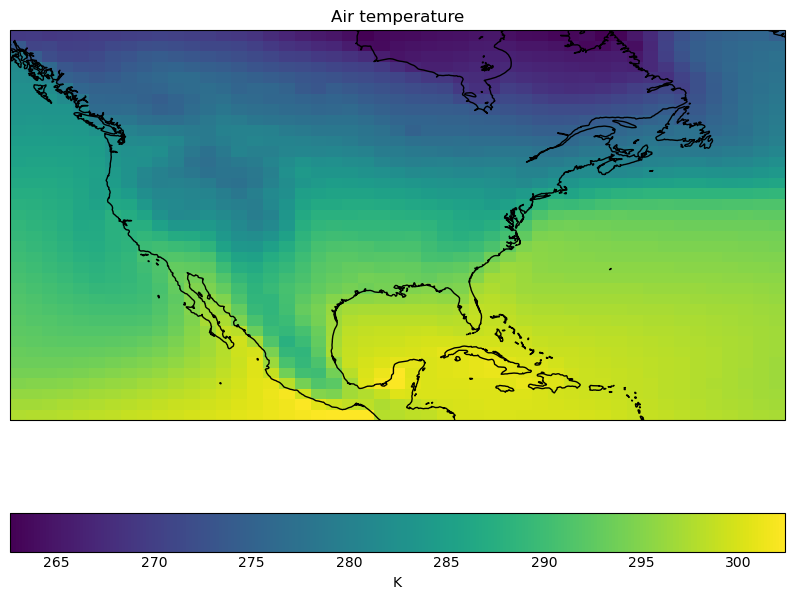

In [20]:
qplt.pcolormesh(time_mean_cube)
ax = plt.gca()
ax.coastlines()
plt.show()

We can also plot a filled contour map of the data and use the basic `iris.plot` interface:

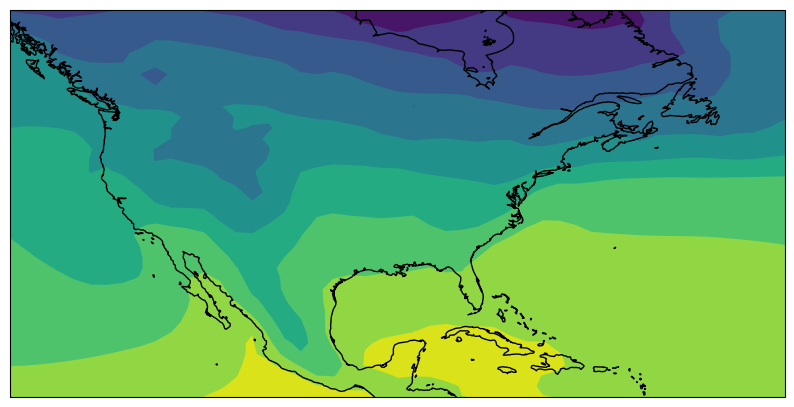

In [21]:
iplt.contourf(time_mean_cube)
ax = plt.gca()
ax.coastlines()
plt.show()

We could also use a constraint (like shown above) to extract all the time values at a single point and plot the change in air temperature at that point over time. For example, let's find out how air temperature changes over time in New York:

In [22]:
ny_lat = 40.42
ny_lon = 286.00

# Use approximate horizontal resolution to make sure we extract the grid box
# containing New York.
lat_res = 0.5
lon_res = 0.9
location_lat = lambda cell: ny_lat - lat_res <= cell <= ny_lat + lat_res
location_lon = lambda cell: ny_lon - lon_res <= cell <= ny_lon + lon_res

ny_location_constraint = iris.Constraint(latitude=location_lat,
                                         longitude=location_lon)
ny_location_cube = a1b_cube.extract(ny_location_constraint)

print(ny_location_cube)

air_temperature / (K)               (time: 240)
    Dimension coordinates:
        time                             x
    Auxiliary coordinates:
        forecast_period                  x
    Scalar coordinates:
        forecast_reference_time     1859-09-01 06:00:00
        height                      1.5 m
        latitude                    40.0 degrees
        longitude                   286.875 degrees
    Cell methods:
        mean                        time (6 hour)
    Attributes:
        Conventions                 'CF-1.5'
        Model scenario              'A1B'
        STASH                       m01s03i236
        source                      'Data from Met Office Unified Model 6.05'


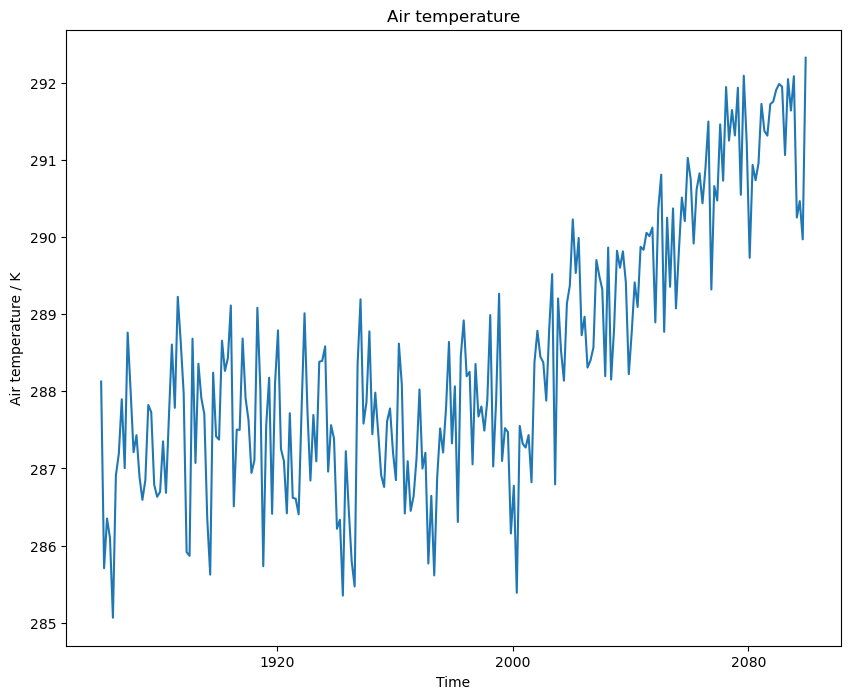

In [23]:
qplt.plot(ny_location_cube)
plt.show()

Plots can be saved using `plt.savefig('my_image.png')` although ensure you save the figure before you call `plt.show()`.

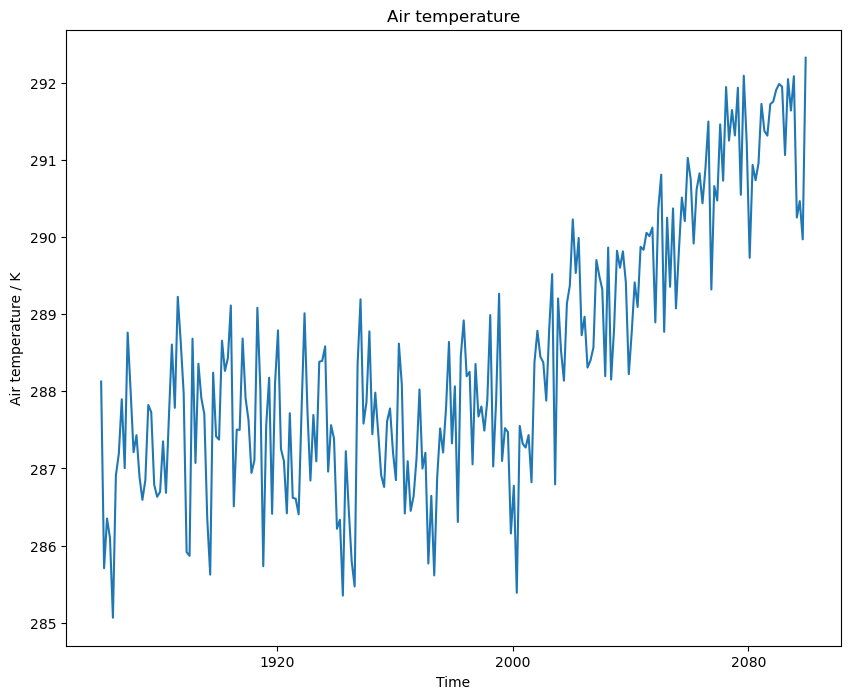

In [24]:
qplt.plot(ny_location_cube)
plt.savefig('my_image.png')
plt.show()

#### Summary: Visualisation

* `iris.plot` and `iris.quickplot` are used to create plots of the data stored in iris Cubes
* `iris.quickplot` automatically adds a plot title, axis titles, and a colour bar when appropriate

## Cartopy

Cartopy ("cartographic Python") adds cartographic map production functionality to matplotlib allowing plotting of geolocated data onto map projections of the Earth's surface. Cartopy provides a Python interface to the `proj.4` library, an Iris interface, extensive feature plotting, and interfaces to other geolocated data formats including shapefiles, web map service providers, and others.

Cartopy is also a free and open-source Python library hosted on GitHub; see https://github.com/SciTools/cartopy.

Full documentation for cartopy can be found at http://scitools.org.uk/cartopy/docs/latest/index.html.

### Installation

As with Iris, you can install cartopy using conda with the following command:

```conda install -c conda-forge cartopy```

### Map projections

Cartopy uses the `proj.4` library to provide map projections that can be used to plot geolocated data. We've already used this functionality when we produced the map plot of the mean average air temperatures over north America. In this case the projection used for the map was the coordinate reference system specified by the cube's `latitude` and `longitude` coordinates:

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


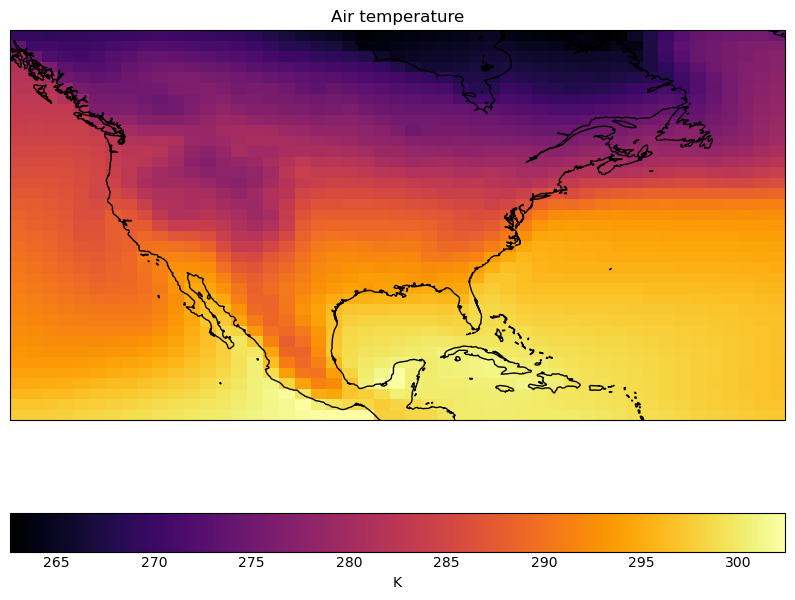

In [25]:
qplt.pcolormesh(time_mean_cube, cmap='inferno')
ax = plt.gca()
ax.coastlines()
plt.show()

We can also specify the map projection we wish to show our data in by using the `projection` keyword argument when setting up a cartopy geoaxes instance. In this case the data to be plotted will be transformed from its coordinate reference system to the specified projection:

In [26]:
import cartopy.crs as ccrs

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


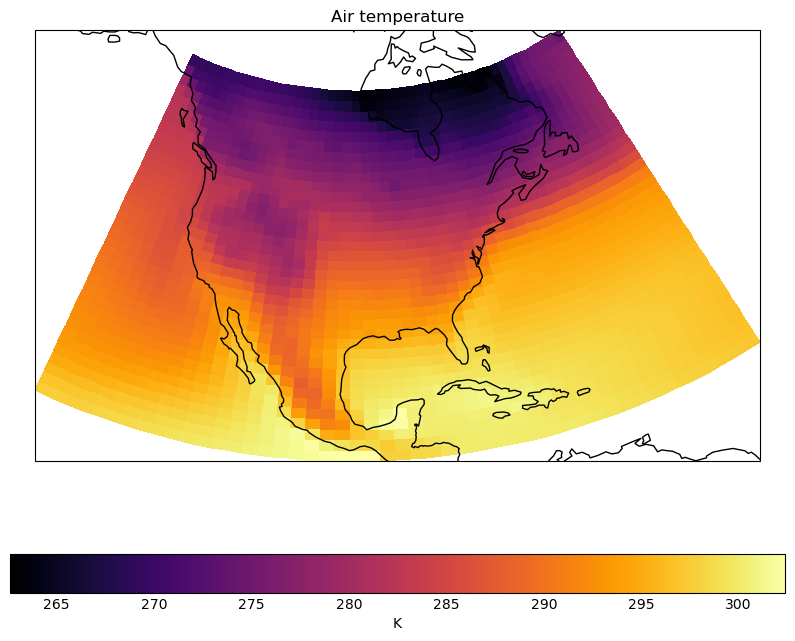

In [27]:
ax = plt.axes(projection=ccrs.LambertConformal())
qplt.pcolormesh(time_mean_cube, cmap='inferno')
ax.coastlines()
plt.show()

A complete list of the available map projections in Cartopy is available https://scitools.org.uk/cartopy/docs/latest/reference/crs.html#list-of-projections

### `projection` and `transform`

To accurately geolocate content on a cartopy map we need to use the `projection` and `transform` keyword arguments correctly.

The `projection` keyword is used when setting up an axes instance. It defines the map projection of the resulting plot:

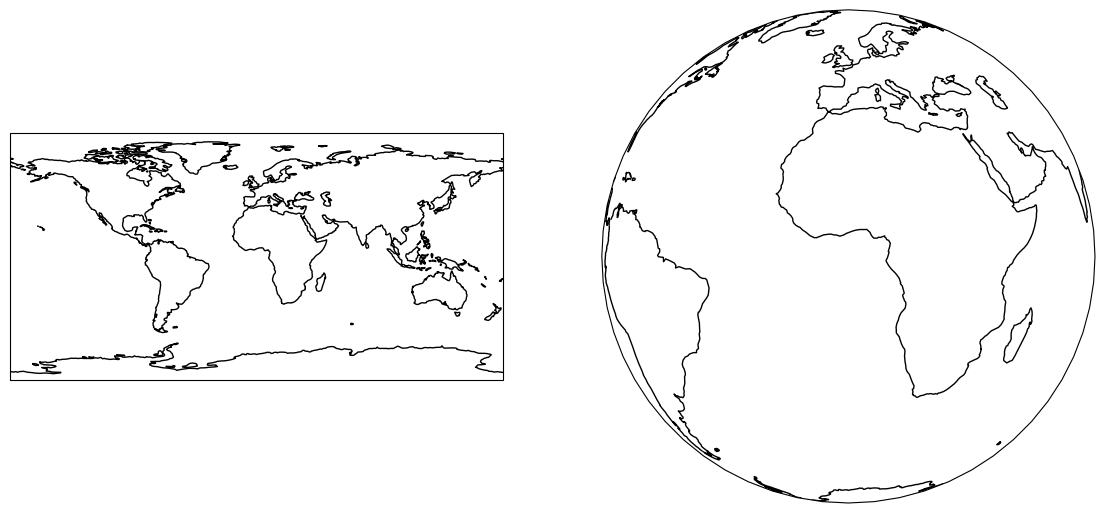

In [28]:
# Make sure the figure is a decent size when plotted.
fig = plt.figure(figsize=(14, 7))

# Upper plot.
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.PlateCarree())
ax1.coastlines()

# Lower plot.
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic())
ax2.coastlines()

# Show both subplots on the same figure.
plt.show()

The `transform` keyword is passed to content that will be plotted on a map. It defines the coordinate reference system that  describes the locations of the content being plotted, and is used to _transform- the locations of the content into the projection of the map that the data will be plotted on. 

Happily, Iris' close integration with cartopy handles most of this for us automatically by passing the coordinate system of the cube to cartopy for us. 

If we need to add further content to the map we will need to make use of the `transform` keyword. For example, above we plotted the temperature changes in New York. We could add a point to the Lambert Conformal map that shows the location of New York, making use of the `transform` keyword to make sure New York appears in the correct location on the map:

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'longitude' is not bounded, guessing contiguous bounds.
  warnings.warn(
/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/iris/coords.py:2048: UserWarning: Coordinate 'latitude' is not bounded, guessing contiguous bounds.
  warnings.warn(


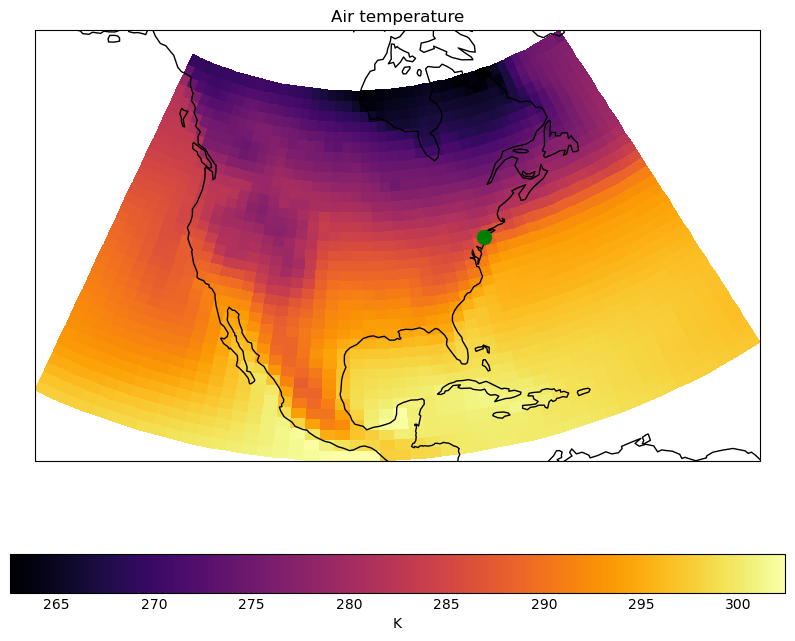

In [29]:
# Set up an axes instance with a Lambert Conformal projection
# and add content and coastlines.
ax = plt.axes(projection=ccrs.LambertConformal())
qplt.pcolormesh(time_mean_cube, cmap='inferno')
ax.coastlines()

# Now plot New York on the map. Note the use of the `transform` keyword.
plt.scatter(ny_lon, ny_lat, c='g', s=100, zorder=10, transform=ccrs.PlateCarree())

plt.show()

### The Feature interface

We've used part of the cartopy feature interface to draw the coastlines on these plots. The `coastlines` method is provided as part of the cartopy `GeoAxes` class API as a convenience method. There are a number of commonly used geographic features provided as convenience attributes of the cartopy feature class:

In [30]:
import cartopy.feature as cfeat

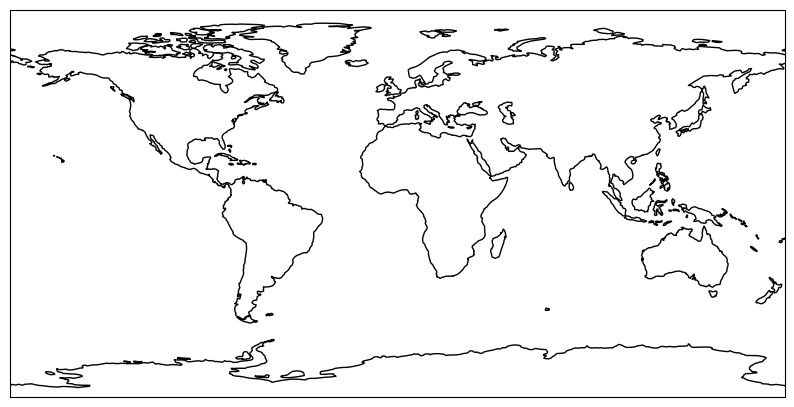

In [31]:
# Add coastlines to the map.
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeat.COASTLINE)  # Equivalent to `ax.coastlines()`
plt.show()

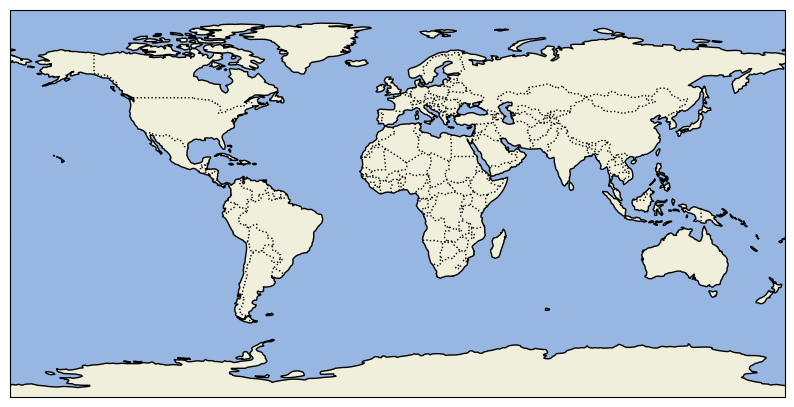

In [32]:
ax = plt.axes(projection=ccrs.PlateCarree())
# Add land and ocean features, that come with preset face colours.
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.LAND)
ax.add_feature(cfeat.OCEAN)
# Add country borders.
ax.add_feature(cfeat.BORDERS, linestyle=':')
plt.show()

### Summary: Cartopy

* Cartopy is used to project the Cube's data on to different map projections
* `projection` is used to define the map projection when constructing a matplotlib Axes instance
* `transform` to tell Cartopy the source coordinate reference system of the data being plotted
* Cartopy can also be used to Natural Earth features, such as coastlines, country boarders, and lakes

## Unstructured Mesh Support

There has been some recent work in Iris to extend support to mesh-located data.

Data that is located on an unstructured mesh is fundamentally different to grid-located data.

On a structured grid, 1D coordinate arrays are combined to construct a grid of points. However, unstructured meshs use nodes, edges, faces and connectivities to define the locations of the data.

<img src="https://scitools-iris.readthedocs.io/en/latest/_images/ugrid_node_independence.svg" width="300" height="200">

Iris' mesh support is based on the [CF-UGRID](https://ugrid-conventions.github.io/ugrid-conventions/) Conventions; UGRID-conformant meshes and data can be loaded from a file into Iris’ data model.

Mesh support in Iris is currently experimental so we need to first enable it.

In [33]:
from iris.experimental.ugrid import PARSE_UGRID_ON_LOAD

with PARSE_UGRID_ON_LOAD.context():
    cubes = iris.load(iris.sample_data_path('mesh_C4_synthetic_float.nc'))
    c4_cube = cubes[0]

print(c4_cube)

synthetic / (1)                     (-- : 96)
    Mesh coordinates:
        latitude                        x
        longitude                       x
    Mesh:
        name                        Topology data of 2D unstructured mesh
        location                    face
    Attributes:
        NCO                         'netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = h ...'
        history                     'Mon Apr 12 01:44:41 2021: ncap2 -s synthetic=float(synthetic) mesh_C4_synthetic.nc ...'
        nco_openmp_thread_number    1


We no longer have a `latitude` and `longitude` dimension. Now we have a `mesh dimension` and both the latitude and longitude coordinates map to that. We also have a mesh object.

### Plotting



The Cartopy-Matplotlib combination is not optimised for displaying the high number of irregular shapes associated with meshes.

Instead we developed a tool called Geovista

<img src="https://scitools-iris.readthedocs.io/en/latest/_images/geovistalogo.svg" width="200" height="80">

PyVista is described as “VTK for humans” - VTK is a very powerful toolkit for working with meshes, and PyVista brings that power into the Python ecosystem. GeoVista in turn makes it easy to use PyVista specifically for cartographic work, designed from the start with the Iris Mesh in mind.

/home/h03/ldreyer/.conda/envs/um_user_tutorial/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(


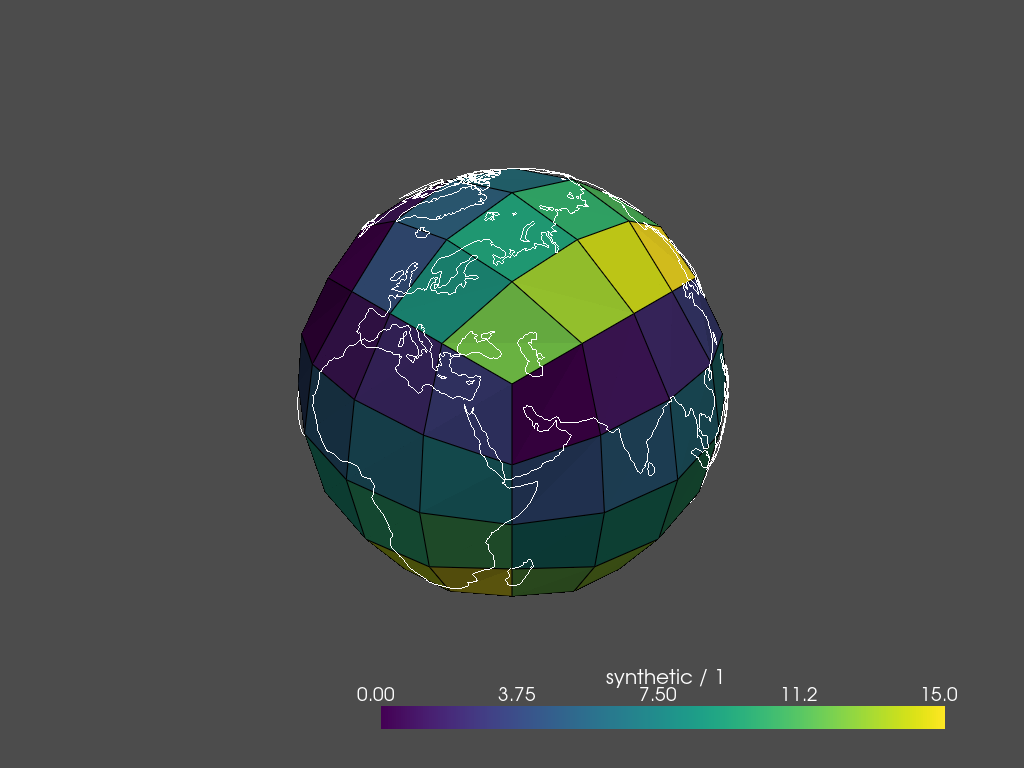

In [34]:
from geovista import GeoPlotter, Transform

# Create the GeoVista mesh from the Iris cube
lons, lats = c4_cube.mesh.node_coords
face_node = c4_cube.mesh.face_node_connectivity
indices = face_node.indices_by_location()
mesh = Transform.from_unstructured(
        lons.points,
        lats.points,
        indices,
        data=c4_cube.data,
        name=f"{c4_cube.name()} / {c4_cube.units}",
        start_index=face_node.start_index,
    )

my_plotter = GeoPlotter()
my_plotter.add_coastlines()
my_plotter.add_mesh(mesh, show_edges=True)
my_plotter.show()

Below is a different example taken from the Geovista documentation:

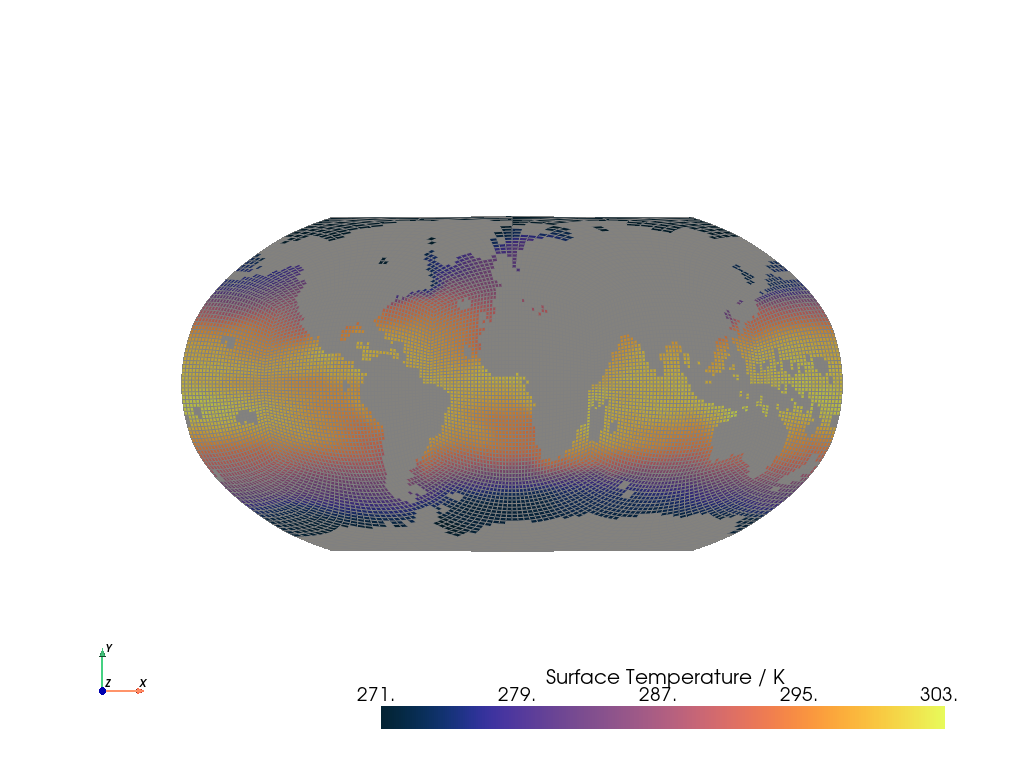

In [35]:
from geovista.pantry import lfric_sst
import geovista.theme

# Load the sample data.
sample = lfric_sst()

# Create the mesh from the sample data.
mesh = Transform.from_unstructured(
    sample.lons,
    sample.lats,
    sample.connectivity,
    data=sample.data,
    start_index=sample.start_index,
)

# Plot the mesh on a Robinson projection using an ESRI spatial reference identifier.
plotter = GeoPlotter(crs="ESRI:54030")
sargs = dict(title=f"{sample.name} / {sample.units}")
plotter.add_mesh(mesh, cmap="thermal", show_edges=True, edge_color="grey", scalar_bar_args=sargs)
plotter.view_xy()
plotter.add_axes()
plotter.show()

## Find out more

Further information and examples are provided in the documentation 
   * https://scitools.org.uk/iris/docs/latest/
   * https://scitools.org.uk/cartopy/docs/latest/
   
There are also self-teach courses:
   * https://github.com/SciTools/courses

### Getting help

* Ask questions:
    * Iris on GitHub Q&A Discussions - https://github.com/SciTools/iris/discussions/categories/q-a
    * Cartopy on stackoverflow - https://stackoverflow.com/questions/tagged/cartopy
    * Cartopy on Matplotlib's discourse - https://discourse.matplotlib.org/c/3rdparty/cartopy/19
* Report bugs or suggest features 
    * Iris on GitHub Issues - https://github.com/SciTools/iris/issues
    * Cartopy on GitHub Issues - https://github.com/SciTools/cartopy/issues